## **Dataset Size**

In [ ]:
#get stats for CovidET data
import json
import pandas as pd

#convert CovidET json file into pandas dataframe
with open("/content/train_anonymized-WITH_POSTS_additional_emotions.json") as f:
  dataset = json.load(f)

posts = []
emotion_set = {'joy', 'trust', 'disgust', 'confusion', 'resilience'}

for k in dataset:
  annotations = {}
  for j, annotation in enumerate(dataset[k]['Annotations']): #annotation 0, annotation 1
    emotions = []
    for hit in dataset[k]['Annotations'][annotation]:  #emotion, abstractive pair
        if hit['Emotion'] in emotion_set:
          posts.append({"Emotion":hit['Emotion'], "Abstractive": hit["Abstractive"], "Reddit Post Original": dataset[k]['Reddit Post']})
df = pd.DataFrame(posts)
display(df)

,Emotion,Abstractive,Reddit Post Original
0,confusion,Now Im seeing so much conflicting information ...,Im suppose to get my first vaccination soon. E...
1,trust,I started to trust the vaccine after gather lo...,Im suppose to get my first vaccination soon. E...
2,confusion,I'm confused if she has the delta variant even...,Hi. My mom is already fully vaccinated (with S...
3,confusion,I am confused if he will have a full recovery ...,My husband tested positive last week despite b...
4,confusion,I'm confused about what to do and need suggest...,Ive been fully vaccinated since mid April. I w...
...,...,...,...
1036,confusion,I'm confused because my wife got an exposure n...,My wife got a notification on her iPhone. It w...
1037,confusion,I'm confused about whether people think I shou...,"I ate a very large meal Friday, felt really na..."
1038,joy,I think this is informative and helpful in the...,Anybody want to read about something happy abo...
1039,trust,I trust the information sources where I learne...,Anybody want to read about something happy abo...


In [ ]:
df["num_words"] = df["Reddit Post Original"].apply(lambda x: len(x.split())) #df["Reddit Post Original"].str.split(" ").size
df["length"] = df["Reddit Post Original"].str.len()
print(df.groupby("Emotion").size())

#If both annotators annotate same emotion, only count once
df = df.drop_duplicates(subset=['Reddit Post Original', 'Emotion'], keep='first')
print(df[df[['Reddit Post Original', 'Emotion']].duplicated()])
display(df.head(10))

Emotion
confusion     500
disgust       227
joy           159
resilience     55
trust         100
dtype: int64
Empty DataFrame
Columns: [Emotion, Abstractive, Reddit Post Original, num_words, length]
Index: []


,Emotion,Abstractive,Reddit Post Original,num_words,length
0,confusion,Now Im seeing so much conflicting information ...,Im suppose to get my first vaccination soon. E...,252,1397
1,trust,I started to trust the vaccine after gather lo...,Im suppose to get my first vaccination soon. E...,252,1397
2,confusion,I'm confused if she has the delta variant even...,Hi. My mom is already fully vaccinated (with S...,170,940
3,confusion,I am confused if he will have a full recovery ...,My husband tested positive last week despite b...,100,524
4,confusion,I'm confused about what to do and need suggest...,Ive been fully vaccinated since mid April. I w...,299,1602
5,confusion,I'm confused about how to get my results.,I had a pcr test sent to me after requesting i...,187,950
6,disgust,Having a mild case of covid wouldn't be that b...,Another post about my mom again. Now she is fo...,113,561
7,confusion,I'm confused about what to do.,Another post about my mom again. Now she is fo...,113,561
8,trust,Those who got vaccinated can transmit the virus.,[url] A very good article from The NY Times wi...,190,1119
9,joy,I'm happy that breakthrough cases are rare bec...,[url] A very good article from The NY Times wi...,190,1119


In [ ]:
print(df["num_words"].mean())
print(df["length"].mean())
print(df.groupby("Emotion")[["num_words"]].mean())
print(df.groupby("Emotion")[["length"]].mean())
print(df.groupby("Emotion").size())

163.33775510204083
877.7622448979591
             num_words
Emotion               
confusion   151.940000
disgust     198.125000
joy         151.694030
resilience  165.654545
trust       167.909091
                 length
Emotion                
confusion    813.016000
disgust     1059.614583
joy          821.865672
resilience   888.400000
trust        921.828283
Emotion
confusion     500
disgust       192
joy           134
resilience     55
trust          99
dtype: int64


In [ ]:
#stats for ChatGPT data
df = pd.read_csv('/content/ChatGPT Generated - Combined.csv')
df["num_words"] = df["Reddit Post"].apply(lambda x: len(x.split()))
df["length"] = df["Reddit Post"].str.len()
df['Emotion'] = df['Emotion'].str.split(', ')
df = df.explode('Emotion').reset_index(drop=True)
display(df)

print(df["num_words"].mean())
print(df["length"].mean())
print(df.groupby("Emotion")[["num_words"]].mean())
print(df.groupby("Emotion")[["length"]].mean())
print(df.groupby("Emotion").size())

,Reddit Post,Summary,Emotion,num_words,length
0,The ongoing COVID-19 rollercoaster has me baff...,The constant emergence of new COVID variants a...,confusion,35,242
1,"Today, they say masks are no longer necessary,...",The ever-shifting mask mandates and guidelines...,confusion,36,240
2,"Booster shots, conflicting studies, and daily ...","A whirlwind of information, from booster shot...",confusion,32,214
3,"I've received my vaccine, but the talk of new ...","Despite being vaccinated, the discussion arou...",confusion,31,197
4,COVID has been a part of our lives for so long...,"The enduring presence of COVID, coupled with e...",confusion,38,255
...,...,...,...,...,...
1025,I witnessed an acquaintance intentionally touc...,I witnessed an acquaintance intentionally touc...,disgust,22,156
1026,"An online influencer promoted a ""COVID-19 dare...","An online influencer's promotion of a ""COVID-1...",disgust,21,161
1027,A friend admitted to intentionally spreading f...,A friend admitted to intentionally spreading f...,disgust,21,159
1028,A family member bragged about hosting an indoo...,A family member bragged about hosting an indoo...,disgust,24,156


20.02135922330097
128.40291262135923
            num_words
Emotion              
confusion   21.509709
disgust     22.090000
joy         20.683721
resilience  18.703349
trust       17.085000
                length
Emotion               
confusion   128.995146
disgust     142.445000
joy         131.758140
resilience  126.779904
trust       111.840000
Emotion
confusion     206
disgust       200
joy           215
resilience    209
trust         200
dtype: int64


In [5]:
#stats for Reddit-scraped data
import pandas as pd
df = pd.read_csv('/content/NLPAnnotations - Complete Cleaned w_ Summaries.csv')
df = df.rename(columns={"selftext_cleaned": "Reddit Post"})[["ID", "Title", "Reddit Post", "Summary", "Emotion", "New Emotion"]]
df["num_words"] = df["Reddit Post"].apply(lambda x: len(x.split()))
df["length"] = df["Reddit Post"].str.len()
df['Emotion'] = df['Emotion'].str.split(', ')
df['New Emotion'] = df['New Emotion'].str.split(', ')

# if post has multiple emotions, make each emotion a new row
df = df.explode('Emotion').reset_index(drop=True)
df = df.explode('New Emotion').reset_index(drop=True)

display(df)

display(df["num_words"].mean())
display(df["length"].mean())
display(df.groupby("Emotion")[["num_words"]].mean())
display(df.groupby("New Emotion")[["num_words"]].mean())


,ID,Title,Reddit Post,Summary,Emotion,New Emotion,num_words,length
0,16op8i1,Side effects of new covid vaccine?,Any chance the new vaccine doesn't give the sa...,I'm confused if the vaccine gives the same lev...,NaN,confusion,36,209
1,pfyqqn,COVID denialism and policy clarifications,Happy Wednesday everyone As u/spez mentioned i...,COVID has been hard on us and is one of the mo...,NaN,resilience,89,495
2,16okdst,The COVID Orphans…,Back during the pandemics peak (late 2020 - mi...,I'm confused about what happened to the kids w...,NaN,confusion,198,1217
3,121kqyg,My mask isn't really for covid these days...,"Rather, it's proven VERY effective at reducing...",I'm happy that masks have helped to reduce unw...,joy,NaN,33,192
4,un2bf5,"Sadly, I have COVID.",But you know what? I didnt even know I was sic...,I trust that vaccines work. ; I'm disgusted th...,trust,resilience,111,590
...,...,...,...,...,...,...,...,...
364,13horb7,[Triple Therapy &amp; Microclots] Update #2,Hello fellow fighters: wishing you all **heali...,I'm happy that my symptoms have all been manag...,joy,resilience,174,1023
365,134rr2c,My diet triggers are changing,"Like most people here, I developed a histamine...",I'm happy that I can eat foods with histamine ...,joy,resilience,195,1047
366,134rr2c,My diet triggers are changing,"Like most people here, I developed a histamine...",I'm happy that I can eat foods with histamine ...,joy,confusion,195,1047
367,1340d8w,What the f@#! is actually wrong with me?,I recently discovered this subreddit and was a...,I'm happy that I discovered this subreddit. ; ...,joy,confusion,223,1206


130.09756097560975

705.8563685636857

,num_words
Emotion,
disgust,139.656863
joy,169.241935
trust,145.754098


,num_words
New Emotion,
confusion,147.617647
resilience,144.968750


In [ ]:
import json
import pandas as pd

#stats for Backtranslated data
with open("/content/BT_only_new.json") as f:
  dataset = json.load(f)

posts = []
emotion_set = {'joy', 'trust', 'disgust', 'confusion', 'resilience'}

for k in dataset:
  annotations = {}
  for j, annotation in enumerate(dataset[k]['Annotations']): #annotation 0, annotation 1
    emotions = []
    for hit in dataset[k]['Annotations'][annotation]:  #emotion, abstractive pair
        if hit['Emotion'] in emotion_set:
          posts.append({"Emotion":hit['Emotion'], "Abstractive": hit["Abstractive"], "Reddit Post Original": dataset[k]['Reddit Post'][0]})
df = pd.DataFrame(posts)
display(df)

df["num_words"] = df["Reddit Post Original"].apply(lambda x: len(x.split())) #df["Reddit Post Original"].str.split(" ").size
df["length"] = df["Reddit Post Original"].str.len()
print(df.groupby("Emotion").size())

#if both annotators annotate same emotion, only count once
df = df.drop_duplicates(subset=['Reddit Post Original', 'Emotion'], keep='first')
print(df[df[['Reddit Post Original', 'Emotion']].duplicated()])
display(df.head(10))

print(df["num_words"].mean())
print(df["length"].mean())
print(df.groupby("Emotion")[["num_words"]].mean())
print(df.groupby("Emotion")[["length"]].mean())
print(df.groupby("Emotion").size())

,Emotion,Abstractive,Reddit Post Original
0,confusion,Now Im seeing so much conflicting information ...,Why are they making it seem like in my home an...
1,trust,I started to trust the vaccine after gather lo...,Why are they making it seem like in my home an...
2,confusion,I'm confused if she has the delta variant even...,Hi. My mom is already fully vaccinated (with S...
3,confusion,I am confused if he will have a full recovery ...,My husband showed positive last week despite b...
4,confusion,I'm confused about what to do and need suggest...,I have been fully vaccinated since mid-April. ...
...,...,...,...
1036,confusion,I'm confused because my wife got an exposure n...,My wife received a notification on her iPhone....
1037,confusion,I'm confused about whether people think I shou...,"I ate a very big meal on Friday, I felt very n..."
1038,joy,I think this is informative and helpful in the...,Does anyone want to read about something happy...
1039,trust,I trust the information sources where I learne...,Does anyone want to read about something happy...


Emotion
confusion     500
disgust       227
joy           159
resilience     55
trust         100
dtype: int64
Empty DataFrame
Columns: [Emotion, Abstractive, Reddit Post Original, num_words, length]
Index: []


,Emotion,Abstractive,Reddit Post Original,num_words,length
0,confusion,Now Im seeing so much conflicting information ...,Why are they making it seem like in my home an...,153,860
1,trust,I started to trust the vaccine after gather lo...,Why are they making it seem like in my home an...,153,860
2,confusion,I'm confused if she has the delta variant even...,Hi. My mom is already fully vaccinated (with S...,170,917
3,confusion,I am confused if he will have a full recovery ...,My husband showed positive last week despite b...,91,500
4,confusion,I'm confused about what to do and need suggest...,I have been fully vaccinated since mid-April. ...,156,839
5,confusion,I'm confused about how to get my results.,I received an e-mail with an order number that...,165,834
6,disgust,Having a mild case of covid wouldn't be that b...,Another post about my mom again. Now she's for...,110,553
7,confusion,I'm confused about what to do.,Another post about my mom again. Now she's for...,110,553
8,trust,Those who got vaccinated can transmit the virus.,[url] A very good article from The NY Times wi...,164,965
9,joy,I'm happy that breakthrough cases are rare bec...,[url] A very good article from The NY Times wi...,164,965


126.0061224489796
677.5479591836735
             num_words
Emotion               
confusion   121.956000
disgust     139.473958
joy         118.671642
resilience  123.490909
trust       131.666667
                length
Emotion               
confusion   651.770000
disgust     746.093750
joy         646.044776
resilience  666.436364
trust       723.616162
Emotion
confusion     500
disgust       192
joy           134
resilience     55
trust          99
dtype: int64


# **Emotion Co-Occurence Heatmap**

<Axes: >

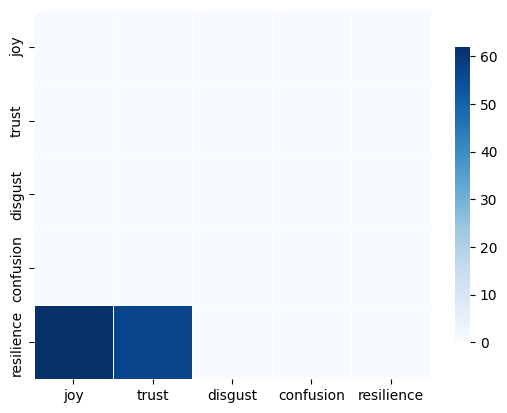

In [6]:
import seaborn as sns
import pandas as pd

data = [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [62, 57, 0, 0, 0]
]

# Row and column labels
row_labels = ["joy", "trust", "disgust", "confusion", "resilience"]
col_labels = ["joy", "trust", "disgust", "confusion", "resilience"]

df = pd.DataFrame(data, index=row_labels, columns=col_labels)

sns.heatmap(df, cmap="Blues", fmt='d', linewidths=.5, cbar_kws={"shrink": 0.8})

In [7]:
import json
from itertools import combinations
with open("/content/scraped_only.json") as f:
    dataset = json.load(f)

emotion_pairs_count = {}
for k in dataset:
    emotions = set()
    for annotation in dataset[k]['Annotations']:
        for hit in dataset[k]['Annotations'][annotation]:
            if hit['Emotion'] in {'trust', 'disgust', 'joy', 'confusion', 'resilience'}:
                emotions.add(hit['Emotion'])

    # Generate emotion co-orccurence pairs
    emotion_pairs = list(combinations(emotions, 2))

    # Update the count for each pair
    for pair in emotion_pairs:
        pair_key = tuple(sorted(pair))  # Sort the pair to ensure consistency
        if pair_key not in emotion_pairs_count:
          emotion_pairs_count[pair_key] = 0
        emotion_pairs_count[pair_key] += 1

# Display the count of emotion pairs
for pair, count in emotion_pairs_count.items():
    print(f"Emotion Pair: {pair}, Count: {count}")

Emotion Pair: ('disgust', 'resilience'), Count: 13
Emotion Pair: ('disgust', 'trust'), Count: 40
Emotion Pair: ('resilience', 'trust'), Count: 11
Emotion Pair: ('joy', 'trust'), Count: 11
Emotion Pair: ('confusion', 'disgust'), Count: 41
Emotion Pair: ('confusion', 'resilience'), Count: 7
Emotion Pair: ('joy', 'resilience'), Count: 30
Emotion Pair: ('confusion', 'trust'), Count: 29
Emotion Pair: ('disgust', 'joy'), Count: 11
Emotion Pair: ('confusion', 'joy'), Count: 16


<Axes: >

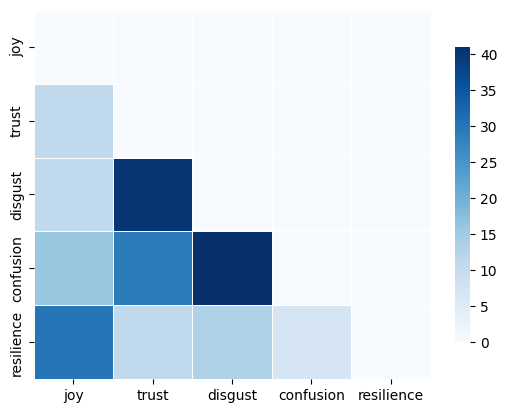

In [8]:
data = [
    [0, 0, 0, 0, 0],
    [11, 0, 0, 0, 0],
    [11, 40, 0, 0, 0],
    [16, 29, 41, 0, 0],
    [30, 11, 13, 7, 0]
]

# Row and column labels
row_labels = ["joy", "trust", "disgust", "confusion", "resilience"]
col_labels = ["joy", "trust", "disgust", "confusion", "resilience"]

df = pd.DataFrame(data, index=row_labels, columns=col_labels)

sns.heatmap(df, cmap="Blues", fmt='d', linewidths=.5, cbar_kws={"shrink": 0.8})